In [75]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import pandas as pd

# TODO - figure out how to pass this info to the bash cell below
#CHROM="1"
#START=77887912
#PERIOD=3

#CHROM="17"
#START=51831667
#PERIOD=3

#CHROM="1"
#START=214679905
#PERIOD=3

#CHROM="11"
#START=126065034
#PERIOD=16

CHROM="9"
START=110676343
PERIOD=7


Populating the interactive namespace from numpy and matplotlib


In [76]:
%%bash 

#CHROM="1"
#START=77887912

#CHROM="17"
#START=51831667

#CHROM="1"
#START=214679905

#CHROM="11"
#START=126065034

CHROM="9"
START=110676343

# Run statstr on this region only
DATADIR=/gymreklab-tscc/helia/ensembl/ensemble_out

statSTR \
    --vcf ${DATADIR}/ensemble_chr${CHROM}_filtered.vcf.gz \
    --vcftype hipstr \
    --afreq --use-length \
    --region chr${CHROM}:${START}-${START} \
    --samples ../het-stats/EUR_samples.txt,../het-stats/EAS_samples.txt,../het-stats/SAS_samples.txt,../het-stats/AMR_samples.txt,../het-stats/AFR_samples.txt,../het-stats/h3africa_samples.txt \
    --sample-prefixes EUR,EAS,SAS,AMR,AFR,H3A \
    --out chr${CHROM}.${START}.stats


Done


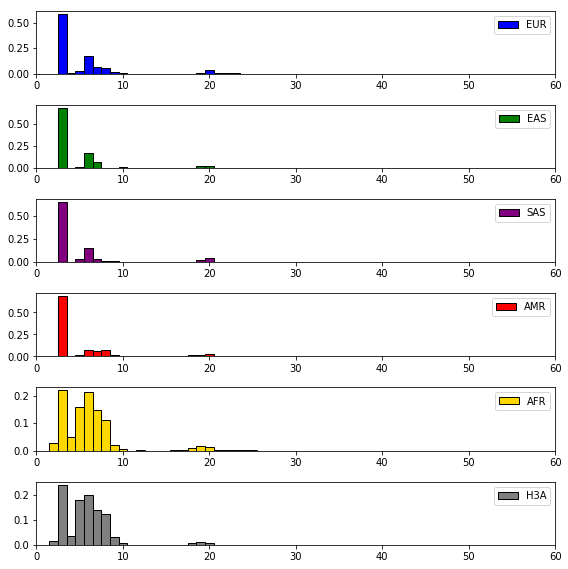

In [77]:
MAXVAL = 60 # change per locus

def GetRowColors(spop):
    if "EUR" in spop: return "blue"
    if "AFR" in spop: return "gold"
    if "AMR" in spop: return "red"
    if "EAS" in spop: return "green"
    if "SAS" in spop: return "purple"
    if "H3" in spop: return "gray"
    
data = pd.read_csv("chr%s.%s.stats.tab"%(CHROM, START), sep="\t")
if data.shape[0] != 1:
    assert("Need to find exactly one locus!")

fig = plt.figure()
fig.set_size_inches((8, 8))
popnum = 0
w = 0.15
for pop in ["EUR","EAS","SAS","AMR","AFR","H3A"]:
    ax = fig.add_subplot(6, 1, popnum+1)
    vals = data["afreq-%s"%pop].values[0]
    xvals = []
    yvals = []
    for ainfo in vals.split(","):
        allele, freq = ainfo.split(":")
        allele = int(float(allele))
        freq = float(freq)
        xvals.append(allele)
        yvals.append(freq)
    ax.bar(xvals, yvals, color=GetRowColors(pop), edgecolor="black", label=pop, width=1)
    ax.legend(loc="upper right")
    popnum += 1
    ax.set_xlim(left=0, right=MAXVAL)
#ax.legend(loc="upper right");
#ax.set_xlabel("Allele length")
#ax.set_ylabel("Frequency");
fig.savefig("%s_%s.commonexp.pdf"%(CHROM, START))
fig.tight_layout()

In [78]:
data

,chrom,start,end,afreq-EUR,afreq-EAS,afreq-SAS,afreq-AMR,afreq-AFR,afreq-H3A
0,chr9,110676343,110676364,"2.142857142857143:0.002,3.0:0.588,4.1428571428...","3.0:0.687,4.142857142857143:0.002,5.1428571428...","3.0:0.653,4.142857142857143:0.006,5.1428571428...","2.142857142857143:0.004,3.0:0.685,4.1428571428...","2.142857142857143:0.029,3.0:0.219,4.1428571428...","2.142857142857143:0.017,3.0:0.240,4.1428571428..."
